In [ ]:
# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.3MB/s eta 0:00:01
pyspark 2.2.1 requires py4j==0.10.4, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'0.23.0'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('E:/datasets/titles.csv.bz2', compression='bz2')
movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [17]:
cast = pd.read_csv('E:/datasets/cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [64]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [66]:
release_dates = pd.read_csv('E:/datasets/release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
5,#Horror,2015,USA,2015-11-20
6,#Horror,2015,UK,2016-05-16
7,#Lucky Number,2015,USA,2015-09-01
8,#Nerealnaya lyubov,2014,Russia,2014-02-13
9,#Pellichoopulu,2016,India,2016-07-29


In [49]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [11]:
len(movies)

244914

### List all Batman movies ever made

In [4]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]


,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [7]:
potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies:', len(potter_df))
potter_df.sort_values(by=['year'],ascending=False)


Total Harry Potter Movies: 8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [12]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [14]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [72]:
movie_range = len(movies[(movies['year'] >= 2000) & (movies['year'] <= 2018)])
movie_range


114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [74]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case='False')]
print('Total Hamlet Movies:', len(hamlet_df))
#hamlet_df

Total Hamlet Movies: 57


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [75]:
hamlet_numbers = hamlet_df[(hamlet_df.year >= 2000)]
print("The movies  released on or after the year 2000\n",hamlet_numbers)
sort_value = hamlet_numbers.sort_values(by=['year'], ascending=True)
print("\nThe movies  released on or after the year 2000 in ascending order\n:",sort_value)

The movies  released on or after the year 2000
                                           title  year
1931                                     Hamlet  2009
10364                             Hamlet A.D.D.  2014
17531                            Hamlet's Ghost  2015
17833                             Zombie Hamlet  2012
40045                               Hamlet (II)  2005
44571                               Hamlet (II)  2015
50271                            Hamlet/Horatio  2017
51236                            Hamlet Unbound  2012
52408                 Hamlet the Vampire Slayer  2008
55525                    Hamlet in the Hamptons  2002
55639                                    Hamlet  2000
70547         Royal Shakespeare Company: Hamlet  2016
78217             Hamlet: The Fall of a Sparrow  2018
98329                               Hamlet (II)  2017
133802            National Theatre Live: Hamlet  2015
137905                                 Hamlet_X  2003
141237                            

### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [82]:
supporting_cast = cast[(cast.title == 'Inception') & (cast.n.isna())]
supporting_cast
print("\n Number of supporting cast :", len(supporting_cast_in_inception_movie))


 Number of supporting cast : 27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [96]:
Inception_df = cast[cast.title == 'Inception']
main_cast = Inception_df[Inception_df.n.notna()]
print("main_cast:\n",main_cast)
print("Number of main cast roles:",len(main_cast))

main_cast:
              title  year                  name     type  \
149008   Inception  2010          Peter Basham    actor   
183937   Inception  2010          Tom Berenger    actor   
260128   Inception  2010        Virgile Bramly    actor   
326745   Inception  2010         Michael Caine    actor   
333415   Inception  2010          Earl Cameron    actor   
433867   Inception  2010         Nicolas Clerc    actor   
444385   Inception  2010        Adam (IV) Cole    actor   
517227   Inception  2010    Jean-Michel Dagory    actor   
590576   Inception  2010     Leonardo DiCaprio    actor   
709436   Inception  2010             Russ Fega    actor   
737322   Inception  2010      Mark Fleischmann    actor   
807795   Inception  2010        Michael Gaston    actor   
812135   Inception  2010       Johnathan Geare    actor   
832083   Inception  2010         Carl Gilliard    actor   
833376   Inception  2010           Jack Gilroy    actor   
859993   Inception  2010  Joseph Gordon-Levi

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [78]:
Inception_df = cast[cast.title == 'Inception']
no = Inception_df.dropna()
no.sort_values(by='n', ascending=True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [9]:
albus_df=cast[cast.character=='Albus Dumbledore']
cleaned = albus_df.dropna()
cleaned

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0


In [10]:
actor = cleaned.name
actor

704984      Dane Farwell
792421    Michael Gambon
792423    Michael Gambon
792424    Michael Gambon
947789    Richard Harris
947790    Richard Harris
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [98]:
role_by = cast[cast.name=='Keanu Reeves']
clean_role_by = role_by.dropna()
#clean_role_by 
cout_roles = len(clean_role_by)
print("No of roles played by Keanu Reeves",cout_roles)
#role_by

No of roles played by Keanu Reeves 58


In [111]:
leading_roles = clean_role_by[(clean_role_by['year'] >= 1999) & (clean_role_by['n'] == 1)]
leading_roles
leading_roles.sort_values(by=['year','n'])
print("The leading roles are:\n",leading_roles)

The leading roles are:
                                  title  year          name   type  \
1892342                       47 Ronin  2013  Keanu Reeves  actor   
1892348                    Constantine  2005  Keanu Reeves  actor   
1892358                      Hard Ball  2001  Keanu Reeves  actor   
1892359                  Henry's Crime  2010  Keanu Reeves  actor   
1892361                      John Wick  2014  Keanu Reeves  actor   
1892362           John Wick: Chapter 2  2017  Keanu Reeves  actor   
1892366                    Knock Knock  2015  Keanu Reeves  actor   
1892378                        Siberia  2018  Keanu Reeves  actor   
1892382                   Street Kings  2008  Keanu Reeves  actor   
1892383                 Sweet November  2001  Keanu Reeves  actor   
1892385  The Day the Earth Stood Still  2008  Keanu Reeves  actor   
1892388                 The Lake House  2006  Keanu Reeves  actor   
1892390                     The Matrix  1999  Keanu Reeves  actor   
1892397   

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [38]:
total_roles = cast[(cast['year'] >= 1950) & (cast['year'] <= 1960)]
#total_roles
#print("total no\n of roles\n along with NAN values are:",len(total_roles),total_roles)
cleaned_tol_roles = total_roles.dropna()
cleaned_tol_roles
print("total roles are:\n and lis of role are: ",len(cleaned_tol_roles),cleaned_tol_roles)


total roles are:
 and lis of role are:  130208                                title  year                  name     type  \
66                   Fire Down Below  1957  'Stretch' Cox Troupe    actor   
67                      De zaak M.P.  1960         Frans 't Hoen    actor   
68                Dorp aan de rivier  1958         Frans 't Hoen    actor   
111             Ci sposeremo a Capri  1956         Quartetto 2+2    actor   
134                         Noi duri  1960          5 Asternovas    actor   
287       Sri Venkateswara Mahatmyam  1960    Subba Rao A.V. Jr.    actor   
288                 Palletoori Pilla  1950        Subba Rao A.V.    actor   
289      Sri Kalahastiswara Mahatyam  1954        Subba Rao A.V.    actor   
290       Sri Venkateswara Mahatmyam  1960        Subba Rao A.V.    actor   
303                    Brudebuketten  1953             Per Aabel    actor   
389        Spin and Marty: The Movie  1955             Dee Aaker    actor   
393                          

In [42]:
tol_roles = cast[(cast['year'] >= 2007) & (cast['year'] <= 2017)]
#total_roles
#print("total no\n of roles\n along with NAN values are:",len(total_roles),total_roles)
cleaned_total_roles = tol_roles.dropna()
cleaned_total_roles
print("total roles are:\n and lis of role are: ",len(cleaned_total_roles),cleaned_total_roles)


total roles are:
 and lis of role are:  736363                                                      title  year  \
0                                           Closet Monster  2015   
2                                      Battle of the Sexes  2017   
8        Lapis, Ballpen at Diploma, a True to Life Journey  2014   
10                                 When the Man Went South  2014   
11                                 Little Angel (Angelita)  2015   
16                                         My Song for You  2010   
17                                         My Song for You  2010   
29                                 They Want Dick Dickster  2015   
30                                        Mahogany Sunrise  2014   
31                                                 Wakolda  2013   
39                               Nothing Like the Holidays  2008   
40                                            Ransum Games  2014   
41                                        Subtle Seduction  2008   
4

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

Main cast has n value in decreasing order of their importance

In [136]:
leading_roles = cast[(cast['year']>=2000) & (cast['n']==1)]
print("\n",leading_roles)
print("\n no of leading_roles:\n",len(leading_roles))


                                               title  year  \
102                          Live Freaky Die Freaky  2006   
138                           All Things Fall Apart  2011   
144                                     Freelancers  2012   
145                          Get Rich or Die Tryin'  2005   
146                                             Gun  2010   
154                                           Setup  2011   
165                                    La hora cero  2010   
243      Mezhzvyozdnyie voyny. Sila probuzhdayetsya  2015   
244      Mezhzvyozdnyie voyny. Sila probuzhdayetsya  2015   
245                                    Mortem (III)  2016   
258                               Tayna Slendermena  2013   
259                             Tayna Slendermena 2  2014   
325                                         Aravaan  2012   
326                                         Aravaan  2012   
329                                           Eeram  2009   
332                   

In [127]:
total_roles = cast[(cast['year']>=2000)]
cleaned_support_cast = total_roles[total_roles['n'].isna()]
cleaned_support_cast
print("total no of support:",len(cleaned_support_cast))
cleaned_support_cast.sort_values(by=['n','character'])

total no of support: 887484


,title,year,name,type,character,n
790702,Iterum,2014,Leah Valerie Galloway,actor,"""Girl in Pink""",NaN
796057,Holes,2003,Edwin Garcia II,actor,'Bones',NaN
1891398,Master of Inventions,2012,Nick Rees,actor,AIDS Patient,NaN
1934268,Dissection of an Olive,2011,Jarrell Roberts,actor,Abel,NaN
2433342,10 Williams,2012,Eric (XVII) White,actor,Actor #3,NaN
1916328,Xi you ji zhi da sheng gui lai,2015,Joey Richter,actor,Additional Voices (US dub),NaN
1798802,La Rondine,2009,Philip Pickens,actor,Adolfo,NaN
18106,Blood Rush,2012,Doug Agnew,actor,Afflicted #1,NaN
3122254,Blood Rush,2012,Julie Kirkman,actress,Afflicted #10,NaN
837734,Blood Rush,2012,Charlie Glackin,actor,Afflicted #2,NaN


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [15]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Honeymoon               11
The Three Musketeers    11
Freedom                 11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

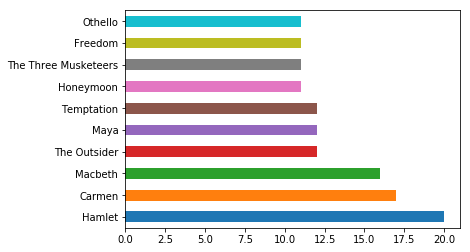

In [16]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [15]:
top3 = movies[movies['year']>=2000]
#top3
count = top3.year.value_counts()[:3]
count

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

Text(0, 0.5, 'year wise')

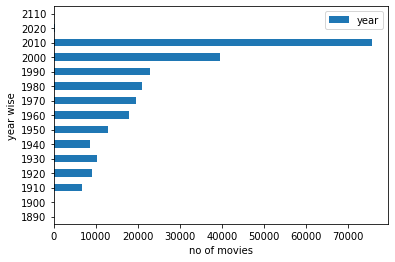

In [32]:
decade = pd.DataFrame(((movies.year//10)*10).value_counts()).sort_index()
graph = decade.plot(kind='barh')
graph.set_xlabel("no of movies")
graph.set_ylabel("year wise")

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [139]:
history = cast[cast.title.str.contains('history', case=False)]
cleaned_history = history.dropna()
cleaned_history.character.value_counts()[:10]

Student                              19
Vestal Virgin - The Roman Empire     10
Prehistoric Man                       8
Disciple - The Roman Empire           8
Himself                               7
Jazz Band Member                      5
Richie's Thug                         3
Coming Attractions                    3
Doctor                                3
Game Show Girl - The Roman Empire     3
Name: character, dtype: int64

In [153]:
herself =history[history["character"]=='Herself'].name.value_counts().iloc[:10]
herself


Marcia DeSanctis       1
Elissa Schappell       1
Jennifer Egan          1
Roxanna Robinson       1
Ebony Fultz            1
Mary (XI) Morris       1
Sandra (VI)            1
Bianca P. Floyd        1
Beverly (III) Grant    1
Name: name, dtype: int64

In [13]:
Himself =history.loc[history["character"]=='Himself'][:10]
Himself

,title,year,name,type,character,n
55235,A Short History of Decay,2014,Kurt (II) Andersen,actor,Himself,NaN
106518,Rewind 4Ever: The History of UK Garage,2013,Mikee B.,actor,Himself,13.0
136400,'85: The Greatest Team in Pro Football History,2016,Ike Barinholtz,actor,Himself,NaN
321844,NHL Greatest Games in Montreal Canadiens History,2008,Jean B?liveau,actor,Himself,NaN
444519,Basketball County: A History of Prince George'...,2018,Christian (V) Cole,actor,Himself,NaN
463493,Basketball County: A History of Prince George'...,2018,Quinn Cook,actor,Himself,NaN
505723,A Short History of Decay,2014,Michael (III) Cunningham,actor,Himself,NaN
515151,Rewind 4Ever: The History of UK Garage,2013,D.T.,actor,Himself,NaN
591385,"The History of Iron Maiden: Part 1, The Early ...",2004,Bruce Dickinson,actor,Himself,NaN
600299,'85: The Greatest Team in Pro Football History,2016,Mike Ditka,actor,Himself,NaN


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [159]:
zombies_df = cast[cast.character.str.startswith('Zombie')].character.value_counts().iloc[:10]
zombies_df

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [160]:
Police_df =cast[cast.character.str.startswith('Police')].character.value_counts().iloc[:10]
Police_df

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

year wise roles count:
 1985    1
1986    3
1988    4
1989    2
1990    2
1991    3
1992    1
1993    3
1994    1
1995    2
1996    2
1997    2
1999    3
2000    3
2001    2
2003    3
2005    3
2006    2
2008    2
2009    1
2010    1
2013    2
2014    1
2015    1
2016    5
2017    2
2018    1
Name: year, dtype: int64


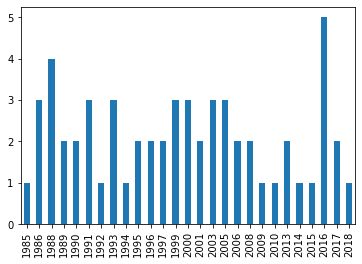

In [30]:
role_by = cast[cast.name=='Keanu Reeves']
clean_role_by = role_by.dropna()
#valuestype(clean_role_by)
year_wise = clean_role_by.year.value_counts().sort_index()
print("year wise roles count:\n",year_wise)
graph = year_wise.plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


year wise n values:
 year
1985     1.0
1986     2.0
1986     3.0
1986    12.0
1988     6.0
1988     2.0
1988     1.0
1988     5.0
1989     8.0
1989     1.0
1990     2.0
1990     6.0
1991     2.0
1991     2.0
1991     1.0
1992     4.0
1993    13.0
1993     1.0
1993     5.0
1994     1.0
1995     1.0
1995     1.0
1996     1.0
1996     1.0
1997     2.0
1997     1.0
1999    42.0
1999    42.0
1999     1.0
2000     3.0
2000     3.0
2000     1.0
2001     1.0
2001     1.0
2003    33.0
2003    59.0
2003     3.0
2005    21.0
2005    17.0
2005     1.0
2006     1.0
2006     4.0
2008     1.0
2008     1.0
2009    16.0
2010     1.0
2013     1.0
2013     2.0
2014     1.0
2015     1.0
2016     8.0
2016    25.0
2016     1.0
2016     8.0
2016     4.0
2017     1.0
2017    11.0
2018     1.0
Name: n, dtype: float64


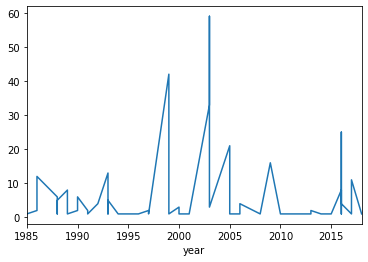

In [44]:
role_by = cast[cast.name=='Keanu Reeves']
clean_role_by = role_by.dropna()
#valuestype(clean_role_by)
year_wise = clean_role_by.set_index('year').sort_index()
year_wise_n = year_wise['n']
print("year wise n values:\n",year_wise['n'])
graph = year_wise_n = year_wise['n'].plot(kind='line')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

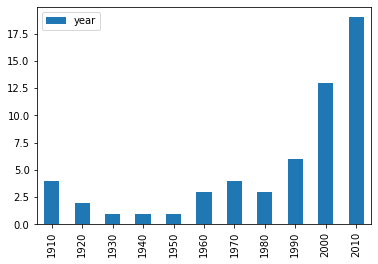

In [48]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case='False')]
per_decade = pd.DataFrame(((hamlet_df.year//10)*10).value_counts()).sort_index()
per_decade.plot(kind="bar")

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [53]:
leading_roles_1900s = cast[(cast['year'] >= 1960) & (cast['year'] <= 1969) & (cast['n']==1)]
leading_roles_1900s
print("Number of leading roles in 1900s:",len(leading_roles_1900s))

Number of leading roles in 1900s: 11823


In [54]:
leading_roles_2000 = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009) & (cast['n']==1)]
leading_roles_2000
print("Number of leading roles in 2000s:",len(leading_roles_2000))

Number of leading roles in 2000s: 26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [117]:
Frank_Oz_df = cast[cast.name.str.contains('Frank Oz',case=False)]
Frank_Oz_df1 = Frank_Oz_df.groupby(['year','title']).count()
Frank_Oz_df1[Frank_Oz_df1.character > 1] 

name  type  character  n
year title                                                         
1979 The Muppet Movie                         8     8          8  8
1981 An American Werewolf in London           2     2          2  2
     The Great Muppet Caper                   6     6          6  6
1982 The Dark Crystal                         2     2          2  2
1984 The Muppets Take Manhattan               7     7          7  7
1985 Follow That Bird                         3     3          3  3
1992 The Muppet Christmas Carol               7     7          7  7
1996 Muppet Treasure Island                   4     4          4  4
1999 Muppets from Space                       4     4          4  4
     The Adventures of Elmo in Grouchland     3     3          3  3

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [118]:
Frank_Oz_df2= Frank_Oz_df.groupby(['character']).count() 
Frank_Oz_df2[Frank_Oz_df2.title > 1].title

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
Name: title, dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

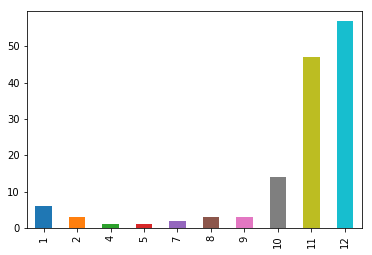

In [17]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

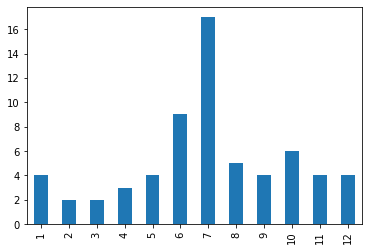

In [67]:
Summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
Summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

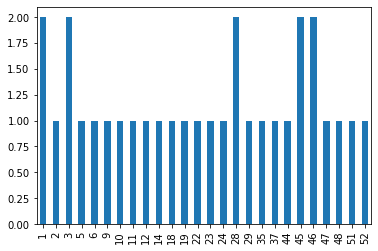

In [68]:
Action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
Action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [72]:
movies = cast[(cast.name=='Keanu Reeves') & (cast.n==1)]
movies_with_dates = pd.merge(left=movies, right=release_dates, on=['title', 'year'])
movies_with_dates[(movies_with_dates.country=='USA')].sort_values(by='date')

,title,year,name,type,character,n,country,date
714,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
78,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
69,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
433,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
441,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
371,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
49,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
91,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
190,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
593,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

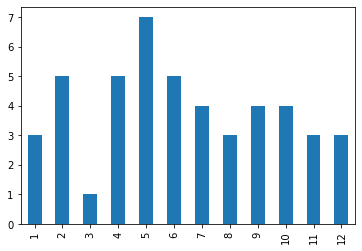

In [79]:
movies = cast[(cast.name=='Keanu Reeves')]
movies_with_dates = pd.merge(left=movies, right=release_dates, on=['title', 'year'])
usa = movies_with_dates[(movies_with_dates.country=='USA')]
usa.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

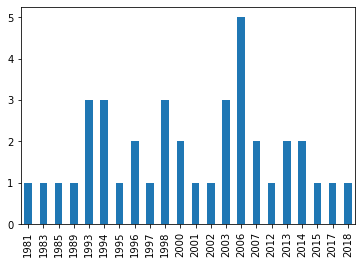

In [81]:
movies = cast[(cast.name=='Ian McKellen')]
movies_with_dates = pd.merge(left=movies, right=release_dates, on=['title', 'year'])
usa = movies_with_dates[(movies_with_dates.country=='USA')]
usa.date.dt.year.value_counts().sort_index().plot(kind='bar')